In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Definition of the Perceptron Class

In [3]:
class Perceptron:
    def __init__(self, size, learning_rate=1, weights=None, threshold=0.5):
        if size <= 0:
            raise ValueError("The Perceptron input size must be > 0")
        if learning_rate <=0:
            raise ValueError("The Perceptron learning rate must be > 0")
        if weights is not None and len(weights) != size:
            raise IndexError("The weights array must be of the same length as in_size")
        if weights is None:
            weights = np.zeros(size)

        self.size = size
        self.rate = learning_rate
        self.weights = weights
        self.threshold = threshold

    def activate(self, x):
        if len(x) != self.size:
            raise IndexError("The input vector is not equal to perceptron size")
        if type(x) is not np.ndarray:
            x = np.array(x)
        return 1 if np.dot(self.weights , x) + self.threshold > 0 else 0

    def backprop(self, x, cl):
        error = (cl - self.activate(x))
        delta = error * self.rate
        self.weights += np.dot(x, delta)
        self.threshold += delta
        return error

## Read the csv and turn the ordinal values into binary.

In [4]:
filename = "mushrooms.csv"
df = pd.read_csv(filename, dtype="category")
df = pd.get_dummies(df)
df.drop('class_p', axis=1, inplace=True)

## Train the perceptron

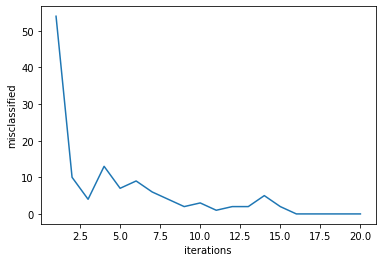

In [7]:
iterations = 20

perc = Perceptron(df.shape[1] - 1)

mscl = []
for i in range(iterations):
    misclassified = 0
    for j, row in df.iterrows():
        error = perc.backprop(row[1:], row[0])
        if error != 0:
            misclassified += 1
    mscl.append(misclassified)
    # print(f"Iteration: {i + 1} misclassified: {misclassified}")

plt.plot(range(1, iterations + 1), mscl)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()